In [1]:
from apiServer import *

In [2]:
api_server_instance = ApiServer()
api_server_instance.help()


__________NERLNET CHECKLIST__________
0. make sure data and jsons in correct places
            
____________API COMMANDS_____________
        Setting experiment:
-showJsons():                       shows available arch / conn / exp layouts
-selectJsons():                     get input from user for arch / conn / exp selection
-setJsons(arch, conn, exp):         set layout in code
-getUserJsons():                    returns the selected arch / conn / exp
-initialization(arch, conn, exp):   set up server for a NerlNet run
-sendJsonsToDevices():              send each NerlNet device the arch / conn jsons to init entities on it
-sendDataToSources(phase):          phase can be "training" / "prediction". send the experiment data to sources (currently happens in beggining of train/predict)
        Starting Run:
-train():                           start training phase
-predict():                         start prediction phase
-contPhase(phase):                  send another `Batch_size` of a

In [5]:
api_server_instance.showJsons()
api_server_instance.selectJsons()
arch_json , connmap_json, exp_flow_json = api_server_instance.getUserJsons()


Architechure Files
--------------------

0.	arch_1PC1WorkerGUI.json
1.	arch_1PC1WorkerHealth.json
2.	arch_1PC1Worker_autoencoder.json
3.	arch_1PC2Worker2RouterGUI.json
4.	arch_1PC2WorkerGUI.json
5.	arch_1PC2Workers2Sources_autoencoder.json
6.	arch_2PC2Workers.json
7.	arch_2PC2Workers1Source.json
8.	arch_3Devs3Workers1SourceGUI.json
9.	arch_3Devs4Workers1SourceGUI.json
10.	arch_3PC2Workers1SourceMonitored.json
11.	arch_4Devs4Workers1Source.json
12.	arch_4Devs4Workers1Source1fed.json
13.	arch_4Devs4Workers1SourceMonitored.json
14.	arch_4Devs4Workers1Source_autoencoder.json
15.	arch_4Devs4Workers2Sources.json
16.	arch_4Devs4Workers2Sources1fed.json
17.	arch_4Devs4Workers2SourcesAzure.json

Connection Map Files
--------------------

0.	conn_1PC1Worker1S.json
1.	conn_1Router2Clients1S.json
2.	conn_1Router3Clients1S.json
3.	conn_1Router4Clients1S.json
4.	conn_1Router4Clients1fed.json
5.	conn_1Router4Clients2Sources.json
6.	conn_1Router4Clients2Sources1fed.json
7.	conn_2Router2Clients1Source

In [6]:
api_server_instance.initialization(arch_json , connmap_json, exp_flow_json)

Network components:
                 Receiver's Address: http://192.168.0.108:8095
                 Batchsize: 10
                 Frequency: 5
                 devicesIp: ['192.168.0.108']
                 mainServerIp: 192.168.0.108
                 mainServerPort: 8080
                 Clients: ['c1']
                 Workers: ['w1']
                 Federated networks: ['f1']
                 Sources: ['s1']
                 Routers: ['r1']
                 Running AEC: 0
Experiment Data:
        Data source:    One_Two
        Batches to send per phase:
            Training:   50
            Prediction: 50
        
Initializing the receiver thread...

Using the address from the architecture JSON file for the receiver.
(http://192.168.0.108:8095)

 * Serving Flask app 'receiver'
 * Debug mode: off

***Please remember to execute NerlnetRun.sh on each device before continuing.


In [7]:
api_server_instance.sendJsonsToDevices()


Sending JSON paths to devices...
JSON paths sent to devices


In [8]:
api_server_instance.sendDataToSources("Training")


Sending data to sources
Update CSV Phase
Data sent to sources

Data ready in sources


In [9]:
api_server_instance.train()


Please choose a name for the current experiment: example

Training - Starting...
Clients Training Phase

Start Casting Phase
~New result has been created successfully~
Training - Finished



api_server_instance.contPhase("train")

In [10]:
api_server_instance.sendDataToSources("Prediction")


Sending data to sources
Update CSV Phase
Data sent to sources

Data ready in sources


In [11]:
api_server_instance.predict()

Prediction - Starting...
Clients Predict Phase

Start Casting Phase
~New result has been created successfully~
Prediction - Finished

Experiment saved


api_server_instance.contPhase("predict")

In [12]:
api_server_instance.print_saved_experiments()


---STATISTICS---

List of saved experiments:
1) example



The training phase contains 1 CSVs:
1) One_Two_train

Please choose a CSV number for the plot (for multiple CSVs, seperate their numbers with ', '): 1

example.png was Saved...


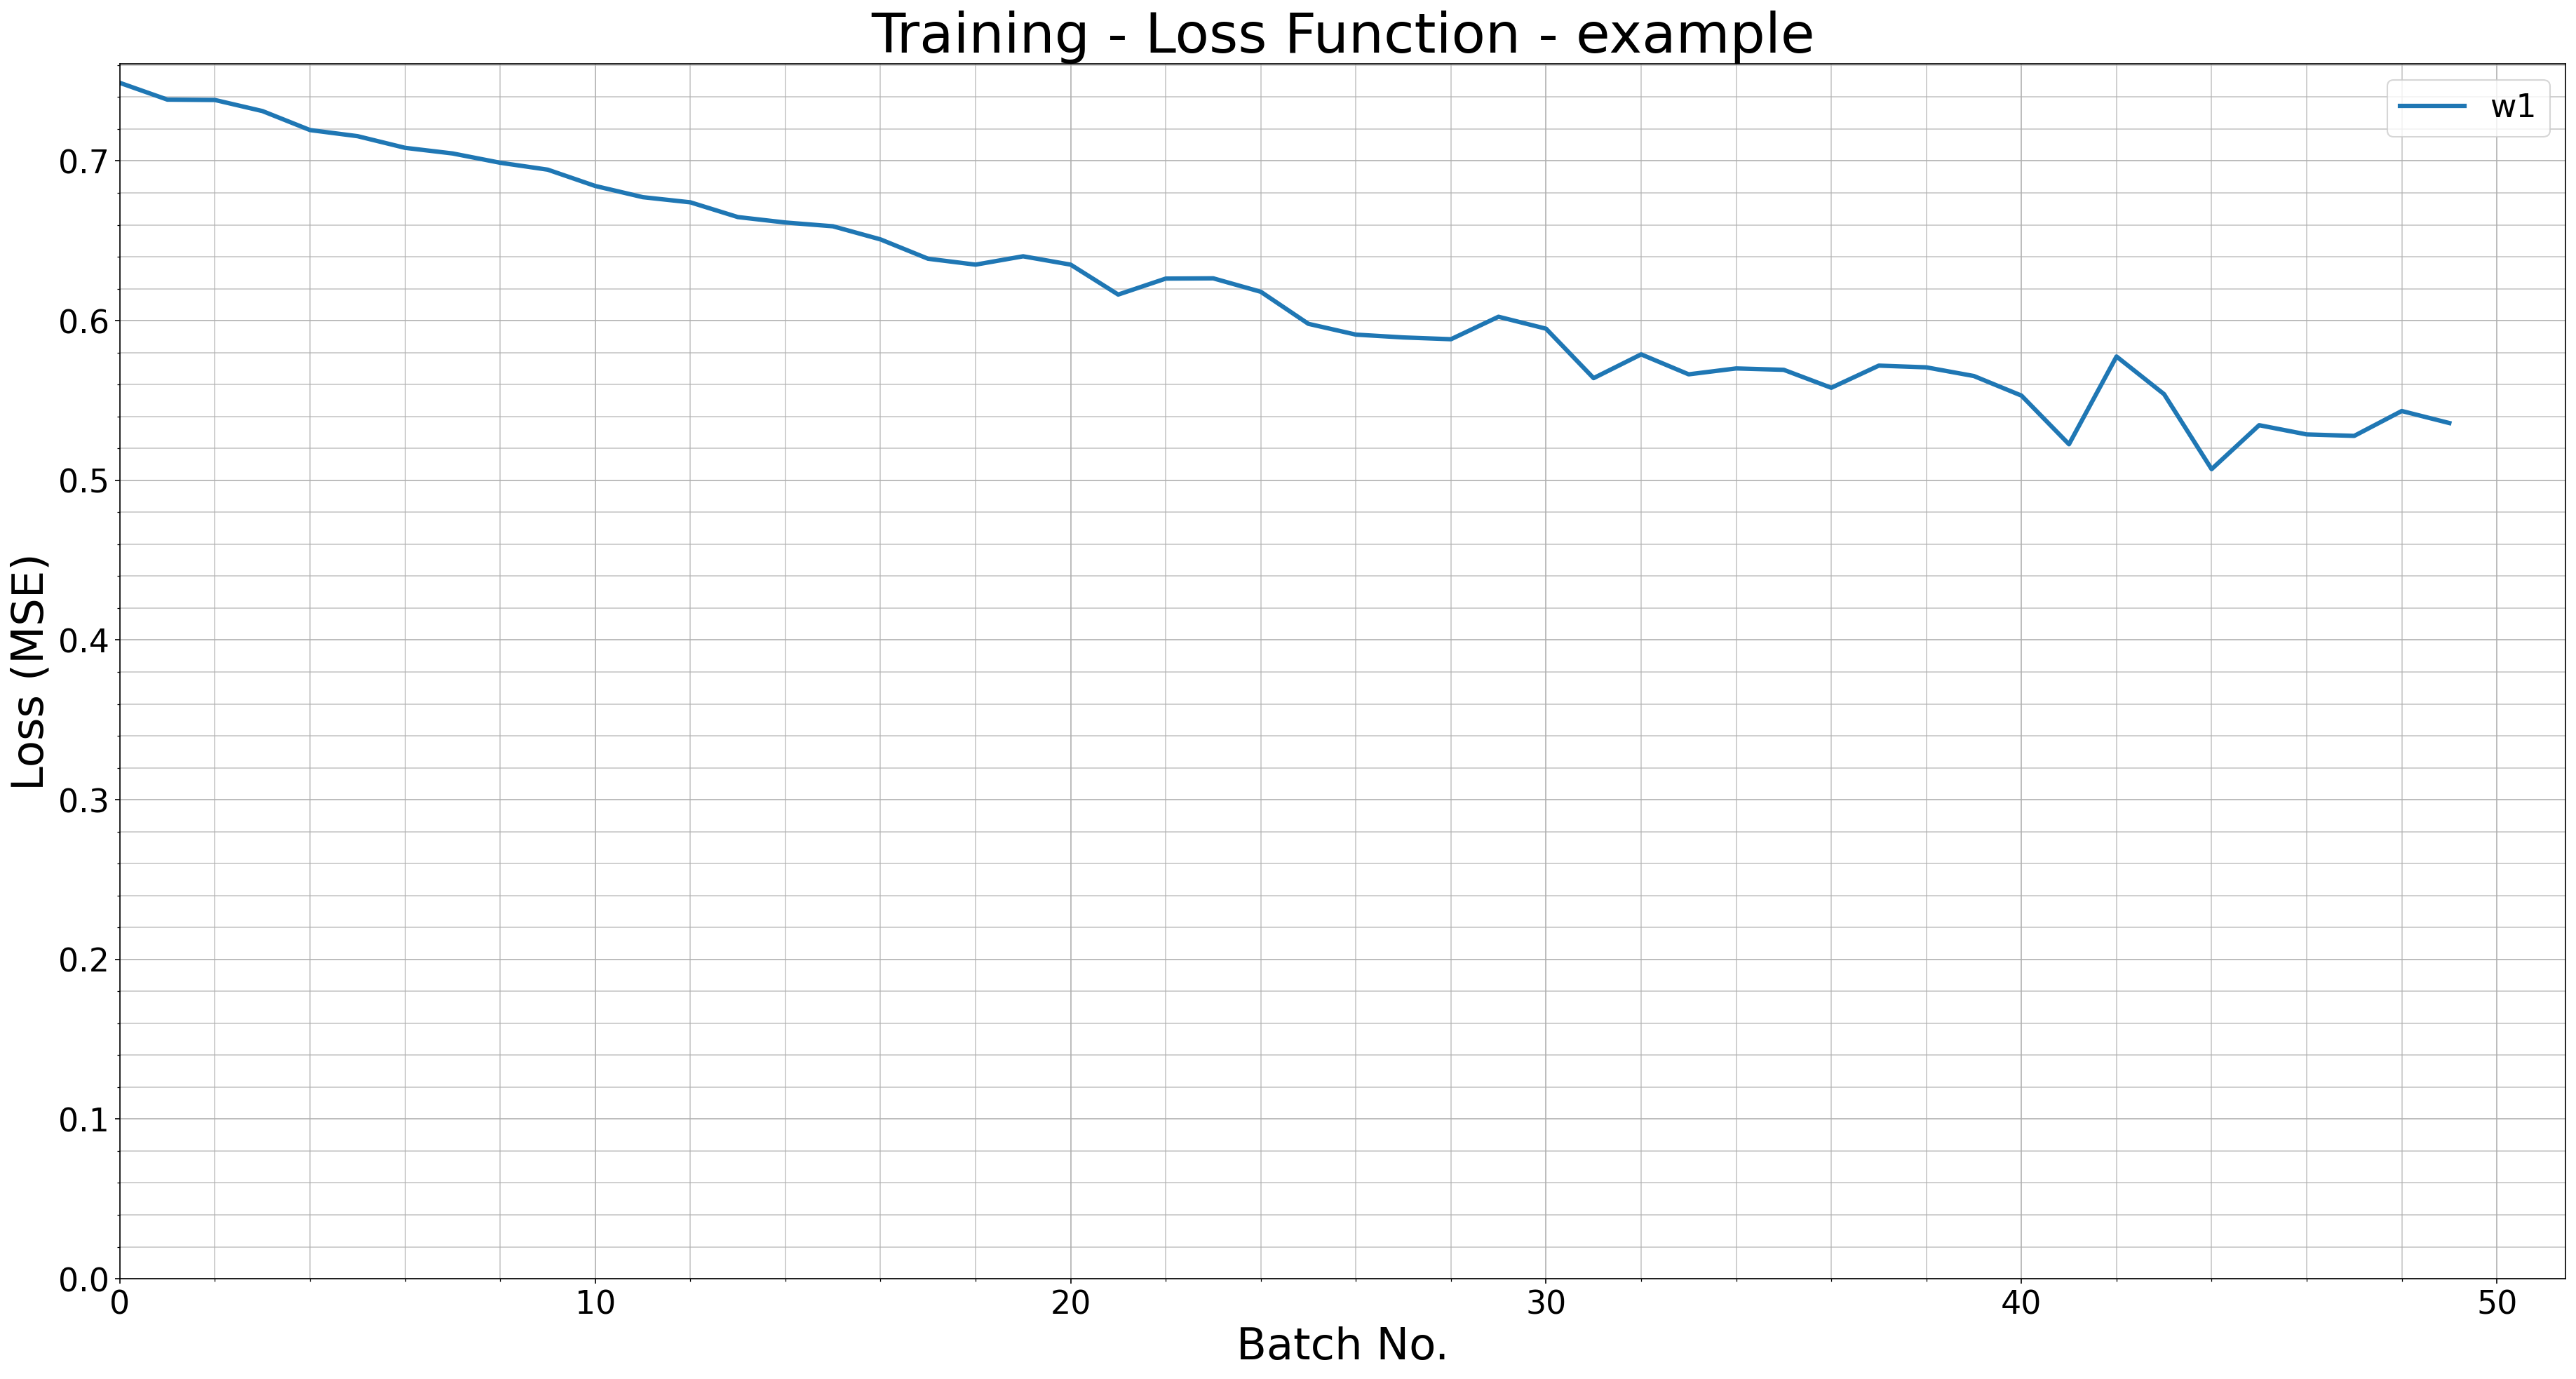

In [13]:
api_server_instance.plot_loss(1)

In [ ]:
api_server_instance.accuracy_matrix(1)


The prediction phase contains 1 CSVs:
1) One_Two_predict

Please choose a CSV number for accuracy calculation and confusion matrix (for multiple CSVs, seperate their numbers with ', '): 